In [1]:
import pandas as pd
import os 

path = os.path.join(os.getcwd(), 'data', 'clorox_data.csv')
df = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jessicaluo/Desktop/BTT-Clorox-Company/eda/data/clorox_data.csv'

In [ ]:
df.head()

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type
0,Clorox,Clorox Wring Clean Cotton Mop,2024-07-08,Target,CLEANING,FLOOR CLEANERS,"The mop is cheap, the wringing attachment does...",1.0,Product review: Click n Clean multi-surface sp...,Clorox
1,Rapid,"32 oz. Rapid Clean Remediation, Trigger Spray ...",2024-07-08,Home Depot,CLEANING,BATHROOM CLEANERS MILDEW CLEANERS,This product was recommended for a front load ...,1.0,Mold removal and prevention products,Competitor
2,Mrs. Meyer's Clean Day,Mrs Meyers Clean Day Cleaner Plastic Bottle Mu...,2024-07-08,Target,CLEANING,SPRAY CLEANERS ALL PURPOSE CLEANERS,"Smells so good, definitely my favorite scent",5.0,Fall scents and their popularity,Competitor
3,Pourri,Poo Pourri Plastic Spray Bottle Toilet Oil Fre...,2024-07-08,Target,CLEANING,ODOR CONTROLLING AIR FRESHENERS,"I keep multiple bottles in the bathroom, and c...",5.0,Household cleaning and sanitization tips,Competitor
4,Twist & Shout,Twist & Shout Spin Mop & Bucket System with 1 ...,2024-07-01,Costco,CLEANING,FLOOR CLEANERS,I recently just got this mop love how easy it ...,5.0,Product review: Click n Clean multi-surface sp...,Competitor


In [ ]:
df.shape

(670798, 10)

## Topic

In [ ]:
df['topic'].value_counts()

topic
Positive reviews for a makeup remover (undetermined topic)             209804
Disinfectant spray recommendations and reviews (undetermined topic)     73069
Review and recommendation for Clorox cleaning products                  12958
Skincare routines and product recommendations                            5993
Loyal users of Chapstick brand                                           4889
                                                                        ...  
Negative experiences with Walmart online shopping                          10
Skincare reactions and irritations                                         10
Long-lasting satisfaction with a beauty product                            10
Hydrating face gel for all skin types                                      10
Displeasure with product scent                                             10
Name: count, Length: 2440, dtype: int64

In [ ]:
df[df['topic'] == 'Skincare routines and product recommendations'].sample(5)

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type
396055,Neutrogena,Neutrogena Liquid Gel Liquid/Cream/Gel Ao Trea...,2023-11-20,Stop&Shop,PERSONAL CARE,FACE CARE FACIAL CLEANSERS,This always does the trick!! I love how it doe...,4.0,Skincare routines and product recommendations,Competitor
519729,Neutrogena,Neutrogena Treatment Liquid/Cream/Gel Salicyli...,2023-05-08,Walmart,PERSONAL CARE,FACE CARE ACNE TREATMENTS,I use this daily in my skin. My skin is oily a...,5.0,Skincare routines and product recommendations,Competitor
560474,Viking Revolution,Viking Revolution Microdermabrasion Face Scrub...,2023-03-06,Amazon,PERSONAL CARE,MEN'S CARE FACIAL CLEANSERS,"Left my skin feeling very greasy, I am sure it...",3.0,Skincare routines and product recommendations,Competitor
254533,Cetaphil,"Cetaphil Face Moisturizer, Gentle Clear Mattif...",2024-05-06,Amazon,PERSONAL CARE,FACE CARE FACIAL MOISTURIZERS,The mattifying formula is perfect for my oily ...,5.0,Skincare routines and product recommendations,Competitor
431497,L'Oreal Paris,"Betty Rose's Botanicals Turmeric Face Mask, Az...",2023-09-25,Amazon,PERSONAL CARE,FACE CARE ACNE TREATMENTS,It doesn't irritated my skin and I love how it...,5.0,Skincare routines and product recommendations,Competitor


In [ ]:
df.iloc[259737, 6]

'Very light and high spf but barely absorbed into the skin and left my face super oily, will not buy again'

### notes
1. assign sentiment to topic
2. cluster topics -- retailer exp, product, brand
**topics are not the same type of evaluation of review, ex: skincare routines and recommendations less specific
 --> sentiment analysis for each review directly

## Brand

In [ ]:
brand_type = df['brand_type'].value_counts()

In [ ]:
print(brand_type['Clorox']/brand_type.sum())

0.1059633451501048


In [ ]:
df['brand'].value_counts()

brand
Neutrogena        86270
Clorox            48286
Cerave            35484
Dove              22502
Cetaphil          20181
                  ...  
Epicuren              1
Fresh Products        1
Robtec                1
Metrex                1
Goicoechea            1
Name: count, Length: 773, dtype: int64

In [ ]:
df[df['brand_type'] == 'Clorox']['brand'].value_counts()

brand
Clorox                         48286
Burt's Bees                    13032
Pine-Sol                        4271
Liquid-Plumr                    2265
Tilex                           1054
Formula 409                      862
S.O.S.                           670
Clorox Commercial Solutions      401
Lestoil                          239
Name: count, dtype: int64

In [ ]:
# brand value counts by category
brand_by_category = df.groupby('category')['brand'].value_counts()
cleaning_brands_counts = brand_by_category['CLEANING']
cleaning_brands_counts

brand
Clorox            48286
Swiffer           13817
Great Value       10896
Lysol             10670
Febreze           10289
                  ...  
Fresh Products        1
Home Sense            1
Metrex                1
Read Right            1
Robtec                1
Name: count, Length: 248, dtype: int64

In [ ]:
pc_brands_counts = brand_by_category['PERSONAL CARE']
pc_brands_counts

brand
Neutrogena                  86270
Cerave                      35484
Dove                        22502
Cetaphil                    20181
Olay                        17566
                            ...  
Nars                            1
Natura Brasil                   1
Simply Divine Botanicals        1
Sonage                          1
Vanity Planet                   1
Name: count, Length: 543, dtype: int64

In [ ]:
# num reviews in each category
num_reviews_by_category = df['category'].value_counts()
num_reviews_by_category

category
PERSONAL CARE    456454
CLEANING         214344
Name: count, dtype: int64

### notes
10.6% reviews belong to Clorox brands -> look for patterns in competitor vs Clorox

9 Clorox brands in total vs 773 competitor brands

248 cleaning brands vs 543 personal care brands

# subcategories

In [ ]:
subcat_counts = df['subcategory'].value_counts()
subcat_counts

subcategory
FACE CARE FACIAL CLEANSERS         86576
FACE CARE FACIAL MOISTURIZERS      86229
FACE CARE ACNE TREATMENTS          50275
FACE CARE FACIAL TOWELETTES        49360
FACE CARE FACIAL TREATMENTS        37971
                                   ...  
ODOR CONTROLLING                      27
DISH CARE LIQUID DISH DETERGENT       14
LIP CARE LIP OILS                      7
CORE GIFTS                             5
BODY CARE HAIR REMOVAL                 1
Name: count, Length: 94, dtype: int64

In [ ]:
subcat_counts.describe()    

count       94.000000
mean      7136.148936
std      15157.331827
min          1.000000
25%        398.250000
50%       1506.000000
75%       6210.500000
max      86576.000000
Name: count, dtype: float64

In [ ]:
# percentile of subcategories with less than 2000 counts
subcat_counts[subcat_counts < 5000].count()/subcat_counts.count()

np.float64(0.7127659574468085)

In [ ]:
processed = pd.read_csv('data/processed_reviews.csv')

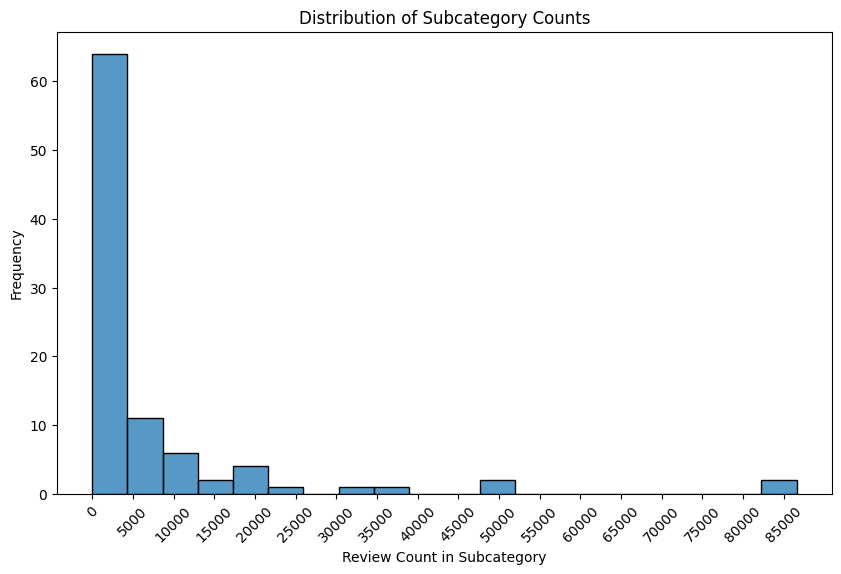

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(subcat_counts.values, bins=20)
plt.xticks(range(0, 90_000, 5_000))
# rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel('Review Count in Subcategory')
plt.ylabel('Frequency')
plt.title('Distribution of Subcategory Counts')
plt.show()


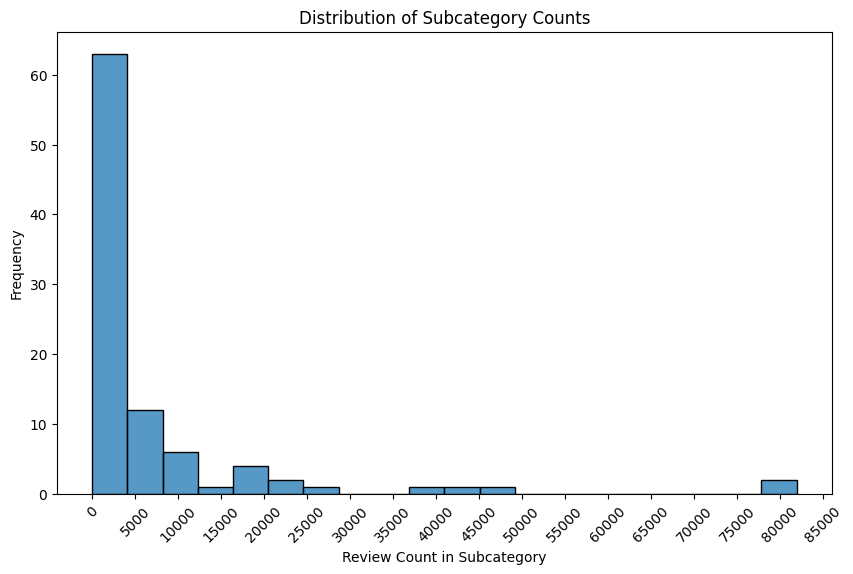

In [ ]:
# same plot for processed


plt.figure(figsize=(10, 6))
sns.histplot(processed['subcategory'].value_counts().values, bins=20)
plt.xticks(range(0, 90_000, 5_000))
# rotate x-axis labels
plt.xticks(rotation=45)
plt.xlabel('Review Count in Subcategory')
plt.ylabel('Frequency')
plt.title('Distribution of Subcategory Counts')
plt.show()

In [ ]:
df['retailer'].value_counts()

retailer
Walmart             243015
Amazon              111417
Target               88804
Walgreens            57536
Kroger               37147
Albertsons           28104
Safeway              17393
Home Depot           16741
Sam's Club           13527
CVS                   9511
Staples               8910
Ulta                  8702
Stop&Shop             7507
Dollar General        5962
Costco                5140
Office Depot          3576
RiteAid               2356
Meijer                1465
Lowe's                1338
Instacart Publix      1119
Vitacost              1101
Quill                  422
Petco                    5
Name: count, dtype: int64

In [ ]:
df['star_rating'].value_counts()

star_rating
5.0    471285
4.0     77234
1.0     59753
3.0     37956
2.0     24570
Name: count, dtype: int64

- topic extraction by subcategory, by category, by retailer, by rating

In [ ]:
df_sample = df.sample(int(0.2*df.shape[0]))

# review length

In [ ]:
df['review_len'] = df['review_text'].apply(lambda x: len(x.split()))

In [ ]:
df['review_len'].value_counts()

review_len
6      18182
7      18162
10     18078
8      18075
9      17882
       ...  
568        1
398        1
508        1
530        1
469        1
Name: count, Length: 478, dtype: int64

<Axes: >

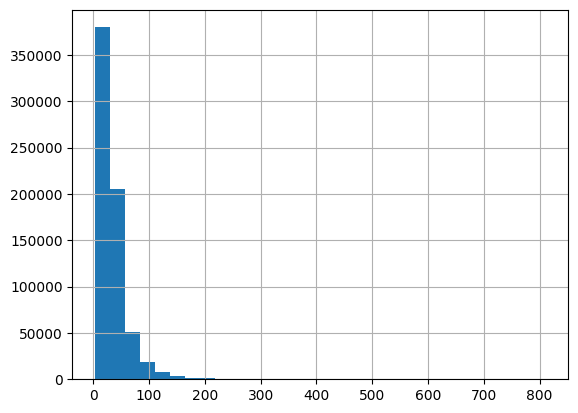

In [ ]:
import matplotlib.pyplot as plt
df['review_len'].hist(bins=30)

In [ ]:
df['review_len'].describe()

count    670798.000000
mean         32.475227
std          29.192604
min           3.000000
25%          13.000000
50%          26.000000
75%          41.000000
max         811.000000
Name: review_len, dtype: float64

In [ ]:
# percentile of reviews with less than 50 words
df[df['review_len'] < 50].shape[0]/df.shape[0]

0.8318465469485598

In [ ]:
# percentile of reviews that are 4/5 stars
df[df['star_rating'] > 3].shape[0]/df.shape[0]

0.8177111440403817

Most reviews are not too long (< 50 words). 478 lengths of reviews.

# group by retailer 
df


In [ ]:
# group by retailer
retailer_review_len = df.groupby('retailer')['star_rating'].mean()
retailer_review_len.sort_values(ascending=False)

retailer
Office Depot        4.826342
Petco               4.800000
Staples             4.749046
Dollar General      4.740523
Safeway             4.645317
Albertsons          4.642115
Sam's Club          4.593849
Quill               4.582938
CVS                 4.504889
Walgreens           4.416139
Lowe's              4.399103
Walmart             4.365451
Vitacost            4.356948
Costco              4.355837
Stop&Shop           4.332623
Home Depot          4.288274
Instacart Publix    4.275246
Kroger              4.275096
RiteAid             4.237691
Meijer              4.196587
Target              4.167965
Amazon              4.006722
Ulta                3.845897
Name: star_rating, dtype: float64

In [ ]:
df.isna().sum()

brand            683
product_title      0
proxy_date         0
retailer           0
category           0
subcategory        0
review_text        0
star_rating        0
topic              0
brand_type         0
review_len         0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
np.sum(df['brand'].isna())

np.int64(683)

# group by brand

In [ ]:
brand_rating = df.groupby('brand')['star_rating'].mean()
brand_rating.sort_values(ascending=False)

brand
Fairy Tales          5.0
Natural Care Plus    5.0
Jolly Rancher        5.0
Kaplan Md            5.0
Korres               5.0
                    ... 
Lemi Shine           1.7
Emerginc             1.0
Melao                1.0
Epicuren             1.0
Dr. Brandt           1.0
Name: star_rating, Length: 773, dtype: float64

In [ ]:
# where brand has at least 100 reviews
brand_rating = df.groupby('brand')['star_rating'].agg(['mean', 'count'])
brand_rating = brand_rating[brand_rating['count'] > 100]
brand_rating.sort_values(by='mean', ascending=False)

,mean,count
brand,,
SKN By Conair,4.855769,104
Breeze Deodorant,4.818182,231
Sprayaway,4.791467,1875
LypSyl,4.779661,236
Spray Nine,4.747126,174
...,...,...
Sudden Change,3.172973,185
Ambi Skincare,3.140000,150
Almay,3.069021,623


In [ ]:
# sort by num reviews
brand_rating.sort_values(by='count', ascending=False)

,mean,count
brand,,
Neutrogena,4.420691,86270
Clorox,4.604212,48286
Cerave,4.311323,35484
Dove,4.656342,22502
Cetaphil,4.081958,20181
...,...,...
Liquid Lightning,3.754902,102
Some By Mi,3.920792,101
Vivo Per Lei,4.099010,101


<Axes: xlabel='mean', ylabel='Count'>

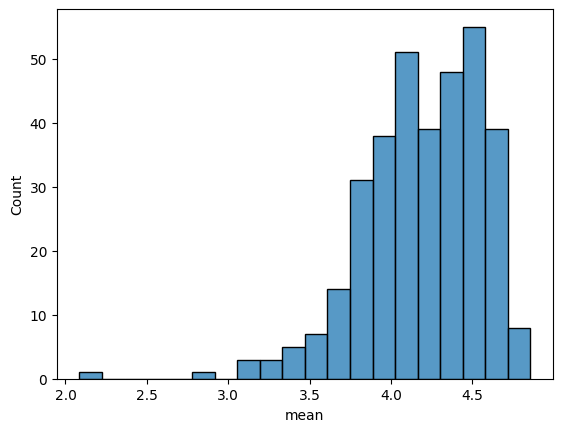

In [ ]:
# visualize avg rating with histogram using seaborn
import seaborn as sns
sns.histplot(brand_rating['mean'])


# ratio of one/two star reviews to three star to four/five star reviews per subcategory

<Axes: xlabel='proportion of 1-2-3 star reviews', ylabel='number of products'>

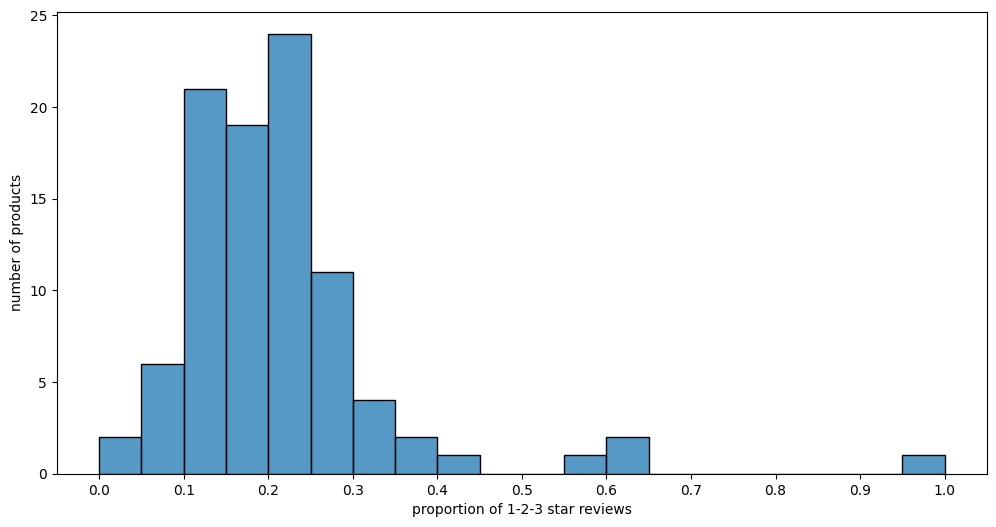

In [ ]:
# plot a histogram with ratio of 1-2-3 star reviews to 4-5 star reviews as x-axis and count of reviews as y-axis
plt.figure(figsize=(12, 6))
# label the axes
plt.xlabel('proportion of 1-2-3 star reviews')
plt.ylabel('number of products')
plt.xticks(np.arange(0, 1.1, 0.1))

# derive the ratio of 1-2-3 star reviews to 4-5 star reviews
df['less_than_4'] = df['star_rating'].apply(lambda x: 1 if x < 4 else 0)
subcat_less_than_4 = df.groupby('subcategory')['less_than_4'].mean()
sns.histplot(subcat_less_than_4, bins=20)

In [ ]:
subcat_less_than_4.describe()

count    94.000000
mean      0.210942
std       0.133737
min       0.000000
25%       0.133134
50%       0.195632
75%       0.242079
max       1.000000
Name: less_than_4, dtype: float64

<Axes: xlabel='proportion of 1-2-3 star reviews', ylabel='number of products'>

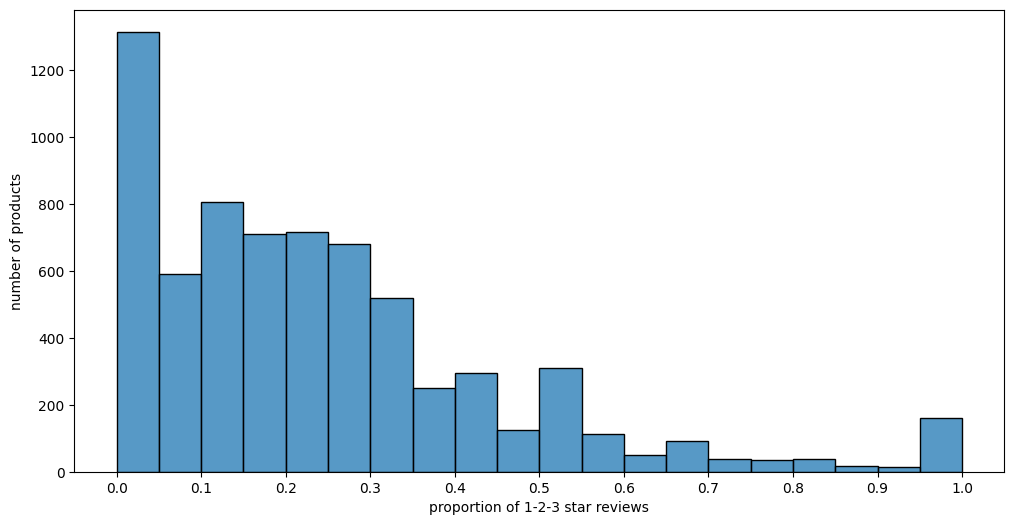

In [ ]:
# plot a histogram with ratio of 1-2-3 star reviews to 4-5 star reviews as x-axis and count of reviews as y-axis
plt.figure(figsize=(12, 6))
# label the axes
plt.xlabel('proportion of 1-2-3 star reviews')
plt.ylabel('number of products')
plt.xticks(np.arange(0, 1.1, 0.1))

# derive the ratio of 1-2-3 star reviews to 4-5 star reviews
df['less_than_4'] = df['star_rating'].apply(lambda x: 1 if x < 4 else 0)
product_prop_less_than_4 = df.groupby('product_title')['less_than_4'].mean()
sns.histplot(product_prop_less_than_4, bins=20)

In [ ]:
product_prop_less_than_4.describe()

count    6878.000000
mean        0.240356
std         0.218171
min         0.000000
25%         0.083333
50%         0.200000
75%         0.333333
max         1.000000
Name: less_than_4, dtype: float64

# products

In [ ]:
# total num of products
df['product_title'].nunique()

6878

In [ ]:
# num reviews per product
num_reviews_per_product = df['product_title'].value_counts()
num_reviews_per_product.describe()

count    6878.000000
mean       97.528060
std       330.220313
min         1.000000
25%         6.000000
50%        25.000000
75%        86.000000
max      8796.000000
Name: count, dtype: float64